In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
df_data = pd.read_csv("data/data.csv")
df_data_genre = pd.read_csv("data/data_by_genres.csv")
df_data_w_genre = pd.read_csv("data/data_w_genres.csv")
df_data_artist = pd.read_csv("data/data_by_artist.csv")
df_data_year = pd.read_csv("data/data_by_year.csv")

In [3]:
df_data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [4]:
### Question: are songs louder today?

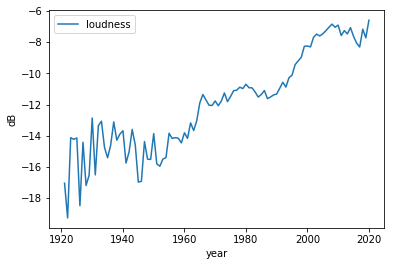

In [5]:
df_loudness = df_data_year[["year", "loudness"]].set_index("year")
df_loudness.plot()
plt.ylabel("dB")
plt.show()

In [6]:
# It is pretty save to say that music is quite a lot louder today. Another question somewhat on the topic would be: "Are songs also more explicit today?"

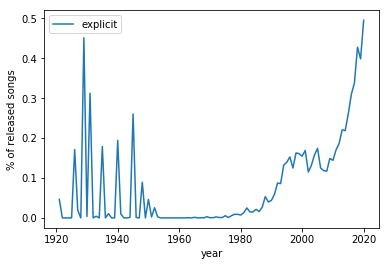

In [7]:
# First, summarize all explicit songs per year
df_explicit = df_data[["year", "explicit"]].groupby("year").sum()
songs_per_year = df_data[["year", "explicit"]].groupby("year").count()

# Normalize to % of released songs
df_explicit.explicit = df_explicit.explicit / songs_per_year.explicit;

# Plot
df_explicit.plot()
plt.ylabel("% of released songs")
plt.show()

In [8]:
# We now now that music is getting louder and dirtier. Sweet.

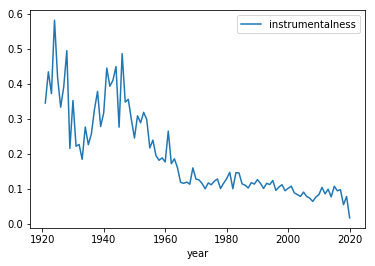

In [11]:
# Question: With classical music and jazz not being as popular today as before, is the instrumentalness lower now?
df_instrumental = df_data_year[["year", "instrumentalness"]].set_index("year")
df_instrumental.plot()
plt.show()

In [12]:
# Again, very convincing results. Even if genres as Electronic Dance Music has become very popular, most songs have vocals today.
# Note the spike around the 1940's. Were there more instrumental music surrounding the second wold war perhaps?

In [13]:
# With that being said, are songs more "dancable today"?

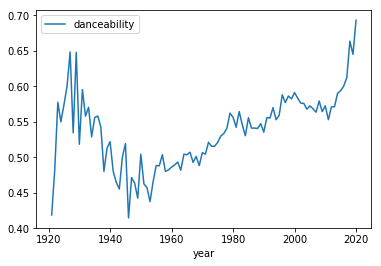

In [14]:
df_dance = df_data_year[["year", "danceability"]].set_index("year")
df_dance.plot()
plt.show()

In [15]:
# We can see a very negative trend around the second wold war in danceability, which is quite interesting. From then it's been rising steadiliy.abs
# However, after what seems to be the peak of the euro-dance trend om the 90's, danceability hade a slight negativ trend in the early 00's.

In [16]:
# What about duration? Are songs longer today?

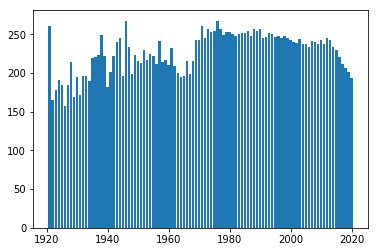

In [17]:
# Let's convert duration to seconds
df_duration = df_data_year[["year", "duration_ms"]].set_index("year")
df_duration.duration_ms = df_duration.duration_ms / 1000.0

# Plot time series
plt.bar(df_duration.index, df_duration.duration_ms)
plt.show()

In [18]:
# The duration of song seems to be on a downgoing trend which is very interesting. Song length has been very stable from the 70's until the last few years.

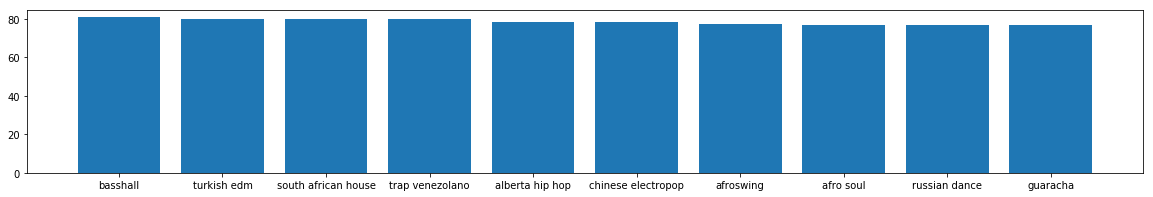

In [19]:
# Moving onto genres. Which 10 genres are the most popular?
df_genre_pop = df_data_genre[["genres", "popularity"]]

df_genre_pop.sort_values(by="popularity", ascending=False, inplace=True)
df_genre_pop = df_genre_pop.reset_index()[0:10]

plt.figure(figsize=(20, 3))
plt.bar(df_genre_pop.genres, df_genre_pop.popularity)
plt.show()

In [20]:
# I don't know about you, but turkish edm is not something I tend to blast in my headphones on my way to work. Strange finding.

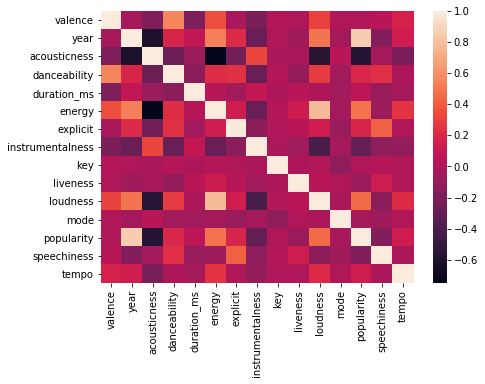

In [21]:
# This awakes the questions: what makes a song popular? Let's find out.

df_pop_heat = df_data.drop(columns=["artists", "id", "name", "release_date"])
correlations = df_pop_heat.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlations)

In [22]:
# Popularity seems to be highly correlated with year. Since the column is defined as "the popularity of the song lately in the US", this is not a schocker. But we also see that energy and loudness is important. And danceability seems to play in a bit. Another strong result is that acoustic and instrumental songs are not very popular. Summary: If you want a hit song, make sure it is loudly mixed, is dancable and is not made on campfire guitar. And make sure to sing.

<BarContainer object of 10 artists>

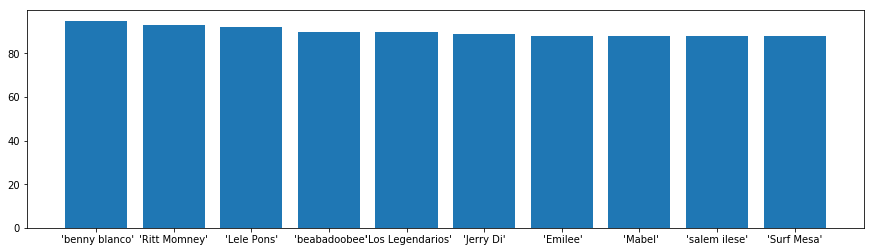

In [23]:
# Let's also have a look at the most popular and artists lately.

# First we want to split the artists lists into single rows
df_pop_artists = df_data
df_pop_artists["artists"] = df_pop_artists["artists"].str.strip("[]").str.split(",")
df_pop_artists = df_pop_artists.explode("artists")

# Now group by artists and get the mean popularity of each
df_pop_artists = df_pop_artists.groupby("artists").mean()
df_pop_artists = df_pop_artists[["popularity"]].sort_values(by="popularity", ascending=False)

# Plot
plt.figure(figsize=(15,4))
df_pop_artists_to_plot = df_pop_artists.head(10)
plt.bar(df_pop_artists_to_plot.index, df_pop_artists_to_plot.popularity)

In [24]:
# I've got to say, I didn't recognize a lot these. But when I looked but a few songs from them they were very familiar. Mostly TikTok-songs :))